# Image Segmentation - Computer Vision

In [1]:
from fastai.vision.all import *

## Create Dataloaders for segmentation training/validation data

In [2]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func=lambda x: path/'labels'/f'{x.stem}_P{x.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

## Create learner and train / fine tune

In [6]:
learner = unet_learner(dls, resnet34)

/Users/neeraj/.virtualenvs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/neeraj/.virtualenvs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
learner.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.965318,2.578774,00:10


epoch,train_loss,valid_loss,time
0,2.004776,1.644816,00:06
1,1.663245,1.345280,00:05
2,1.469118,1.146700,00:05
3,1.308064,0.914885,00:05
4,1.166608,0.800635,00:05
5,1.056958,0.760300,00:05
6,0.964059,0.742850,00:05
7,0.890976,0.736387,00:05


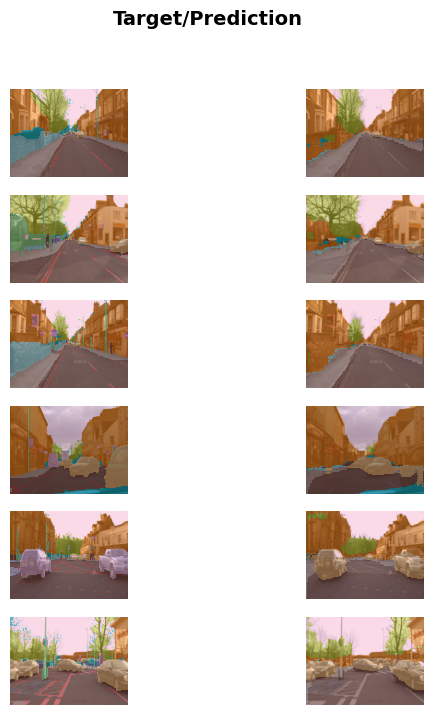

In [10]:
learner.show_results(max_n=6, figsize=(7,8))

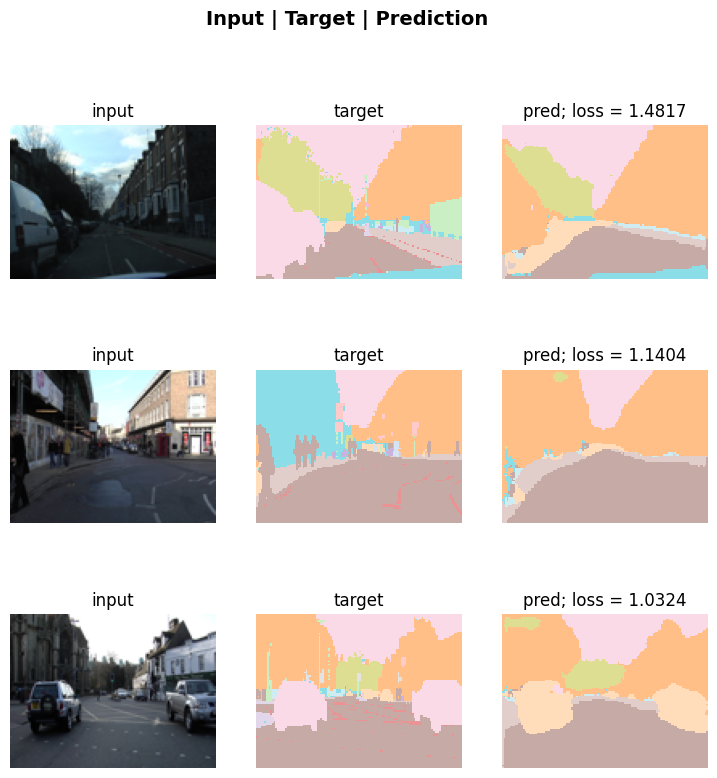

In [12]:
interp = SegmentationInterpretation.from_learner(learner)
interp.plot_top_losses(k=3)

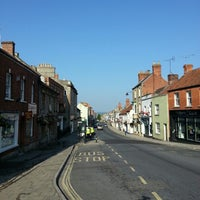

In [15]:
img = Image.open('images/road.jpg')
img